In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dt_cat=pd.DataFrame() #DataFrame that will hold Categorical features
dt_num=pd.DataFrame() # DataFrame that will hold Numerical features

data =pd.read_csv('adult.csv', na_values=["?"])
data.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


# Feature:Income

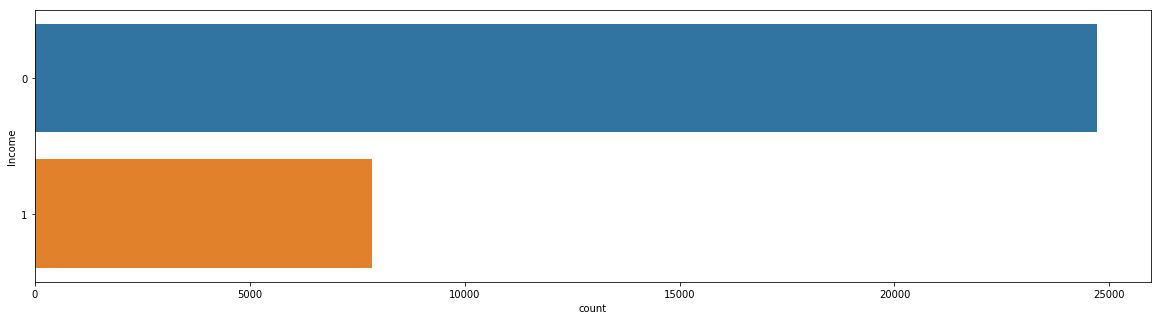

In [5]:
dt_num['Income']=data['income']
dt_num['Income'] = np.where(dt_num['Income'] == '>50K', 1, 0) 
plt.figure(figsize=(20, 5))
sns.countplot(y='Income',data=dt_num)


# Feature:Age

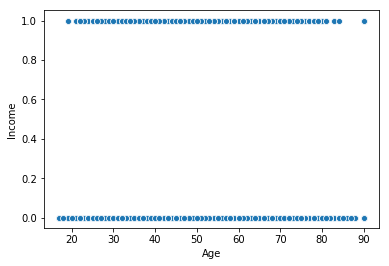

In [6]:
data['age'].isnull().sum()
dt_num['Age']=data['age']
sns.scatterplot(dt_num['Age'],dt_num['Income'])



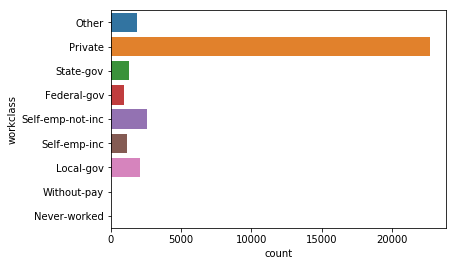

In [7]:
data['workclass'].isnull().sum()
dt_cat['workclass']=data['workclass']
dt_cat['workclass'].fillna(value='Other',inplace=True)
dt_cat['workclass'].isnull().sum()
dt_cat['workclass'].value_counts()
sns.countplot(y='workclass',data=dt_cat)

# FinalWeight

F:\Jupiter\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


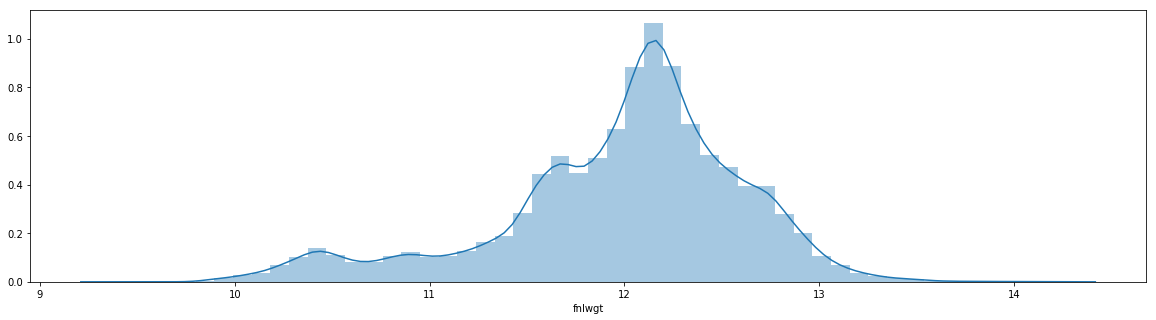

In [8]:
dt_num['fnlwgt']=data['fnlwgt']
dt_num['fnlwgt'].isnull().sum()
plt.figure(figsize=(20, 5))
a=data['fnlwgt']
z=np.log(a)
dt_num['fnlwgt']=z

#sns.scatterplot(dt_num['fnlwgt'],dt_num['Income'])
#sns.distplot(dt_num['fnlwgt'])
sns.distplot(z)


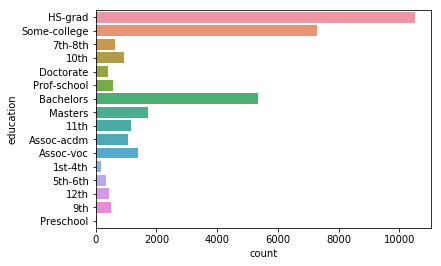

In [9]:
# Feature:Education
dt_cat['education']=data['education']
dt_cat['education'].isnull().sum()
sns.countplot(y='education',data=dt_cat)


In [94]:
#Feature: Education.num
dt_num['education.num']=data['education.num']
dt_num['education.num'].isnull().sum()

0

In [1]:
#Marital Status
dt_cat['marital.status']=data['marital.status']
dt_cat['marital.status'].isnull().sum()
sns.countplot(y='marital.status',data=dt_cat)
dt_cat['marital.status'].value_counts()

NameError: name 'data' is not defined

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Other                1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

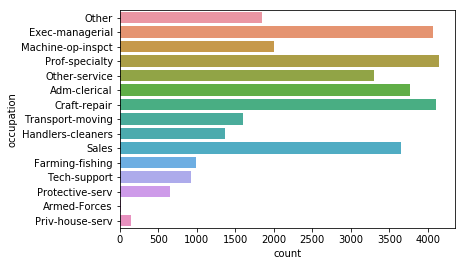

In [96]:
dt_cat['occupation']=data['occupation']
dt_cat['occupation'].isnull().sum()
dt_cat['occupation'].value_counts()
dt_cat['occupation'].fillna(value='Other',inplace=True)
dt_cat['occupation']
sns.countplot(y='occupation',data=dt_cat)
dt_cat['occupation'].value_counts()

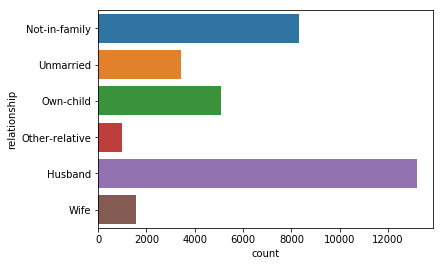

In [11]:
# Feature:Relationship
dt_cat['relationship']=data['relationship']
dt_cat['relationship'].isnull().sum()
dt_cat['relationship'].value_counts()
sns.countplot(y='relationship',data=dt_cat)


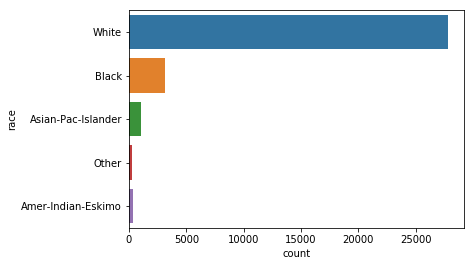

In [12]:
# Feature: Race
dt_cat['race']=data['race']
dt_cat['race'].isnull().sum()
dt_cat['race'].value_counts()
sns.countplot(y='race',data=dt_cat)

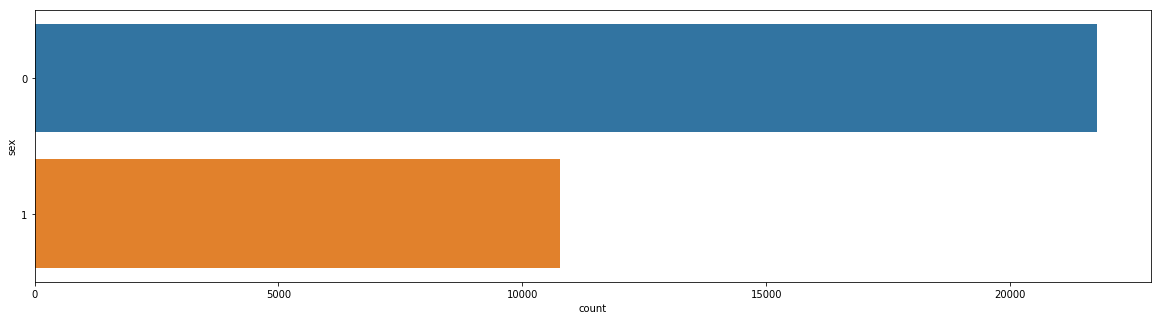

In [14]:
# Feature: Sex
dt_num['sex']=data['sex']
dt_num['sex'] = np.where(dt_num['sex'] == 'Female', 1, 0) # change sex to 0 for male and 1 for female
plt.figure(figsize=(20, 5))

#sns.scatterplot(dt_num['sex'],dt_num['Income'])
sns.countplot(y='sex',data=dt_num)
#sns.distplot(dt_num['sex'])

brfore  (32561, 6)
after  (32561, 6)


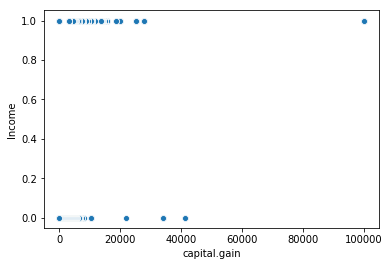

In [100]:
#Feature:Capital Gain
dt_num['capital.gain']=data['capital.gain']
dt_num['capital.gain'].isnull().sum()
sns.scatterplot(dt_num['capital.gain'],dt_num['Income'])

# from scipy import stats
# z=np.abs(stats.zscore(dt_num))
# # print(z)
print("brfore ",dt_num.shape)
# threshold=9
# print(np.where(z>9))
# print(z[1519][5])
# dt_num=dt_num[(z<9).all(axis=1)]
# #sns.scatterplot(dt_num['capital.gain'],dt_num['Income'])
print("after ",dt_num.shape)


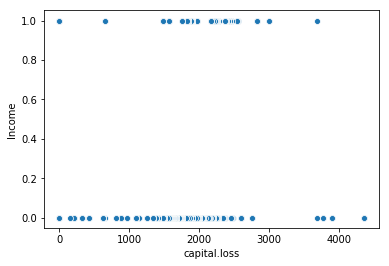

In [101]:
#Feature: Capital Loss
dt_num['capital.loss']=data['capital.loss']
dt_num['capital.loss'].isnull().sum()
sns.scatterplot(dt_num['capital.loss'],dt_num['Income'])


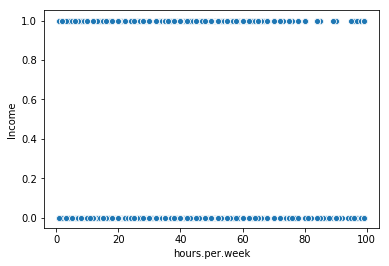

In [102]:
# Feature Hours per Week
dt_num['hours.per.week']=data['hours.per.week']
dt_num['hours.per.week'].isnull().sum()
dt_num['hours.per.week'].value_counts()
sns.scatterplot(dt_num['hours.per.week'],dt_num['Income'])


In [103]:
#Feature: Native Country
dt_cat['native.country']=data['native.country']
dt_cat['native.country'].isnull().sum()
dt_cat['native.country'].value_counts()
dt_cat['native.country'].fillna(value='Other',inplace=True)
dt_cat['native.country'].isnull().sum()
dt_cat["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Other                1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

# Feature Encoding

In [104]:
dt_cat["workclass"] = dt_cat["workclass"].replace(['Private','Self-emp-not-inc','Self-emp-inc'], 'Pri')
dt_cat["workclass"] = dt_cat["workclass"].replace(['Local-gov','State-gov','Federal-gov'], 'Govt')
dt_cat["workclass"] = dt_cat["workclass"].replace(['Other','Without-pay','Never-worked'], 'Oth')

dt_cat["workclass"] = dt_cat["workclass"].map({"Govt":1, "Pri":0, "Oth":2})
# dt_cat["workclass"] = dt_cat["workclass"].astype(int)


In [105]:
dt_workclass_one_hot = pd.get_dummies(dt_cat['workclass'],prefix='workclass')
dt_workclass_one_hot

,workclass_0,workclass_1,workclass_2
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,0,1,0
8,0,1,0
9,1,0,0


In [106]:
dt_cat["education"] = dt_cat["education"].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'], 'School')
dt_cat["education"] = dt_cat["education"].replace(['HS-grad','Bachelors','Some-college','Prof-school','Assoc-acdm','Assoc-voc'], 'Grad')
dt_cat["education"] = dt_cat["education"].replace(['Masters','Doctorate'], 'Higher')

dt_cat["education"] = dt_cat["education"].map({"Grad":1, "School":0, "Higher":2})


In [107]:
dt_education_one_hot = pd.get_dummies(dt_cat['education'],prefix='education')
dt_education_one_hot.head()

,education_0,education_1,education_2
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [108]:
dt_cat["marital.status"] = dt_cat["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dt_cat["marital.status"] = dt_cat["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dt_cat["marital.status"] = dt_cat["marital.status"].map({"Married":1, "Single":0})

In [109]:
dt_maritalstatus_one_hot = pd.get_dummies(dt_cat['marital.status'],prefix='marital.status')
dt_maritalstatus_one_hot.head()

,marital.status_0,marital.status_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [110]:
dt_cat["occupation"] = dt_cat["occupation"].replace(['Prof-specialty','Exec-managerial','Adm-clerical','Sales','Tech-support'], 'Office')
dt_cat["occupation"] = dt_cat["occupation"].replace(['Protective-serv','Priv-house-serv','Armed-Forces','Farming-fishing','Handlers-cleaners','Transport-moving','Machine-op-inspct','Craft-repair'], 'Non-Office')
dt_cat["occupation"] = dt_cat["occupation"].replace(['Other','Other-service'], 'Oth')

dt_cat["occupation"] = dt_cat["occupation"].map({"Non-Office":1, "Office":0, "Oth":2})


In [111]:
dt_occupation_one_hot = pd.get_dummies(dt_cat['occupation'],prefix='occupation')
dt_occupation_one_hot.head()

,occupation_0,occupation_1,occupation_2
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,1,0,0


In [112]:
#dt_cat["relationship"] = dt_cat["relationship"].replace(['Prof-specialty','Exec-managerial','Adm-clerical','Sales','Tech-support'], 'Office')
dt_cat["relationship"] = dt_cat["relationship"].replace(['Husband','Wife','Own-child','Other-relative'], 'Family')
dt_cat["relationship"] = dt_cat["relationship"].replace(['Not-in-family','Unmarried'], 'Oth')

dt_cat["relationship"] = dt_cat["relationship"].map({"Family":1, "Oth":0})


In [113]:
dt_relationship_one_hot = pd.get_dummies(dt_cat['relationship'],prefix='relationship')
dt_relationship_one_hot.head()

,relationship_0,relationship_1
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [114]:
dt_cat["race"] = dt_cat["race"].replace(['Black'], 'Black')
dt_cat["race"] = dt_cat["race"].replace(['White'], 'White')
dt_cat["race"] = dt_cat["race"].replace(['Asian-Pac-Islander','Amer-Indian-Eskimo','Other'], 'Oth')


#dt_cat["relationship"] = dt_cat["relationship"].replace(['Not-in-family','Unmarried'], 'Oth')

dt_cat["race"] = dt_cat["race"].map({"White":1, "Black":0, "Oth":2})


In [115]:
dt_race_one_hot = pd.get_dummies(dt_cat['race'],prefix='race')
dt_race_one_hot.head()

,race_0,race_1,race_2
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [116]:
dt_num.shape

(32561, 8)

In [117]:
dt_con_onehot = pd.concat([dt_num,
                        dt_education_one_hot, 
                        dt_maritalstatus_one_hot, 
                        dt_occupation_one_hot,
                        dt_race_one_hot,
                        dt_relationship_one_hot,
                        dt_workclass_one_hot], axis=1)
dt_con_onehot.head()

#Removing Outliers
# print('b4',dt_con_onehot.shape)
# dt_con_onehot.drop(dt_con_onehot[dt_con_onehot['capital.gain'] > 80000].index, inplace=True)
# print('after',dt_con_onehot.shape)


y=dt_con_onehot['Income']
dt_con_onehot.drop(['Income'], axis=1,inplace=True)
dt_con_onehot.head()

,Age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,education_0,education_1,education_2,...,occupation_1,occupation_2,race_0,race_1,race_2,relationship_0,relationship_1,workclass_0,workclass_1,workclass_2
0,90,11.252249,9,1,0,4356,40,0,1,0,...,0,1,0,1,0,1,0,0,0,1
1,82,11.797126,9,1,0,4356,18,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,66,12.133830,10,1,0,4356,40,0,1,0,...,0,1,1,0,0,1,0,0,0,1
3,54,11.851959,4,1,0,3900,40,1,0,0,...,1,0,0,1,0,1,0,1,0,0
4,41,12.486213,10,1,0,3900,40,0,1,0,...,0,0,0,1,0,0,1,1,0,0


In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dt_con_onehot,y,test_size=0.20)


# Applying Algorithms

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [120]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
#log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

F:\Jupiter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 84.06
Accuracy CV 10-Fold: 84.12


In [39]:
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 89.26
Accuracy CV 10-Fold: 84.66


In [40]:
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 99.97
Accuracy CV 10-Fold: 80.86


In [1]:
from xgboost import XGBClassifier
mod=XGBClassifier(n_estimators=150)
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(mod, 
                                                                X_train, 
                                                                y_train,
                                                                10)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

NameError: name 'fit_ml_algo' is not defined

In [128]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
model=GradientBoostingClassifier(n_estimators=250)
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(model, 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)

Accuracy: 87.52
Accuracy CV 10-Fold: 86.75


In [289]:
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(RandomForestClassifier(n_estimators=250,max_features=5), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)    

Accuracy: 99.97
Accuracy CV 10-Fold: 85.07


In [127]:
pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)


marital.status_0    0.286353
capital.gain        0.210767
education.num       0.140555
occupation_0        0.085301
marital.status_1    0.070503
Age                 0.066077
capital.loss        0.065600
hours.per.week      0.034269
fnlwgt              0.016352
sex                 0.008294
relationship_0      0.005042
education_0         0.003125
occupation_2        0.002622
relationship_1      0.002188
race_1              0.000935
workclass_1         0.000707
occupation_1        0.000377
education_2         0.000274
workclass_2         0.000263
race_2              0.000167
workclass_0         0.000116
race_0              0.000098
education_1         0.000016
dtype: float64

In [129]:
#From above algorithm observations XGBoost and Gradient Boost Classifier is selected
#Gradient Boost Classifier
from sklearn.metrics import accuracy_score
predictions=model.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))


Accuracy: 86.82634730538922%


In [130]:
#XGBoost Classifier
prediction=mod.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, prediction)))

Accuracy: 86.94917856594503%
